In [122]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import janitor


In [38]:
# Configurações para melhorar a visualização dos gráficos
plt.style.use("ggplot")  # Usando um estilo mais genérico
plt.rcParams["figure.figsize"] = (12, 8)

# Configuração adicional para melhorar a legibilidade
sns.set_context("notebook", font_scale=1.2)


# Carrega dos dados pré-processados

In [151]:
df_clean_0 = pd.read_parquet("data/data_clean_0.parquet").clean_names()
df_pooled_0 = (
    pd.read_parquet("data/data_pooled_0.parquet")
    .reset_index()
    .rename(columns={"index": "id"})
    .clean_names()
)


In [152]:
df_clean_0.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1348 entries, 0 to 1348
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   instituicao_ensino_aluno_2020  727 non-null    category
 1   nome                           1348 non-null   string  
 2   idade_aluno_2020               727 non-null    Int64   
 3   anos_pm_2020                   727 non-null    Int64   
 4   ponto_virada_2020              701 non-null    float64 
 5   inde_2020                      727 non-null    float64 
 6   inde_conceito_2020             727 non-null    category
 7   pedra_2020                     727 non-null    category
 8   destaque_ieg_2020              727 non-null    string  
 9   destaque_ida_2020              727 non-null    string  
 10  destaque_ipv_2020              703 non-null    string  
 11  iaa_2020                       727 non-null    float64 
 12  ieg_2020                       727 non-

In [153]:
df_pooled_0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        4044 non-null   int64   
 1   ano                       4044 non-null   int64   
 2   nome                      4044 non-null   string  
 3   instituicao_ensino_aluno  1413 non-null   object  
 4   idade_aluno               727 non-null    Int64   
 5   anos_pm                   727 non-null    Int64   
 6   ponto_virada              2247 non-null   float64 
 7   inde                      2273 non-null   float64 
 8   inde_conceito             727 non-null    category
 9   pedra                     2275 non-null   object  
 10  destaque_ieg              1589 non-null   string  
 11  destaque_ida              1589 non-null   string  
 12  destaque_ipv              1565 non-null   string  
 13  iaa                       2275 non-null   float6

In [154]:
# Elimina coluna inde_conceito porque foi substituída pela coluna pedra
df_pooled_0.drop(columns="inde_conceito", inplace=True)
df_pooled_0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        4044 non-null   int64   
 1   ano                       4044 non-null   int64   
 2   nome                      4044 non-null   string  
 3   instituicao_ensino_aluno  1413 non-null   object  
 4   idade_aluno               727 non-null    Int64   
 5   anos_pm                   727 non-null    Int64   
 6   ponto_virada              2247 non-null   float64 
 7   inde                      2273 non-null   float64 
 8   pedra                     2275 non-null   object  
 9   destaque_ieg              1589 non-null   string  
 10  destaque_ida              1589 non-null   string  
 11  destaque_ipv              1565 non-null   string  
 12  iaa                       2275 non-null   float64 
 13  ieg                       2275 non-null   float6

In [165]:
# novo dataframe sem linhas com valores nulos na coluna 'ida' (é possível calcular a pedra e o inde a partir dos outros indicadores)
df_pooled_1 = df_pooled_0.dropna(subset=["ida"]).reset_index().drop(columns="index")
df_pooled_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2275 entries, 0 to 2274
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        2275 non-null   int64   
 1   ano                       2275 non-null   int64   
 2   nome                      2275 non-null   string  
 3   instituicao_ensino_aluno  1413 non-null   object  
 4   idade_aluno               727 non-null    Int64   
 5   anos_pm                   727 non-null    Int64   
 6   ponto_virada              2247 non-null   float64 
 7   inde                      2273 non-null   float64 
 8   pedra                     2275 non-null   object  
 9   destaque_ieg              1589 non-null   string  
 10  destaque_ida              1589 non-null   string  
 11  destaque_ipv              1565 non-null   string  
 12  iaa                       2275 non-null   float64 
 13  ieg                       2275 non-null   float6

<Axes: ylabel='Frequency'>

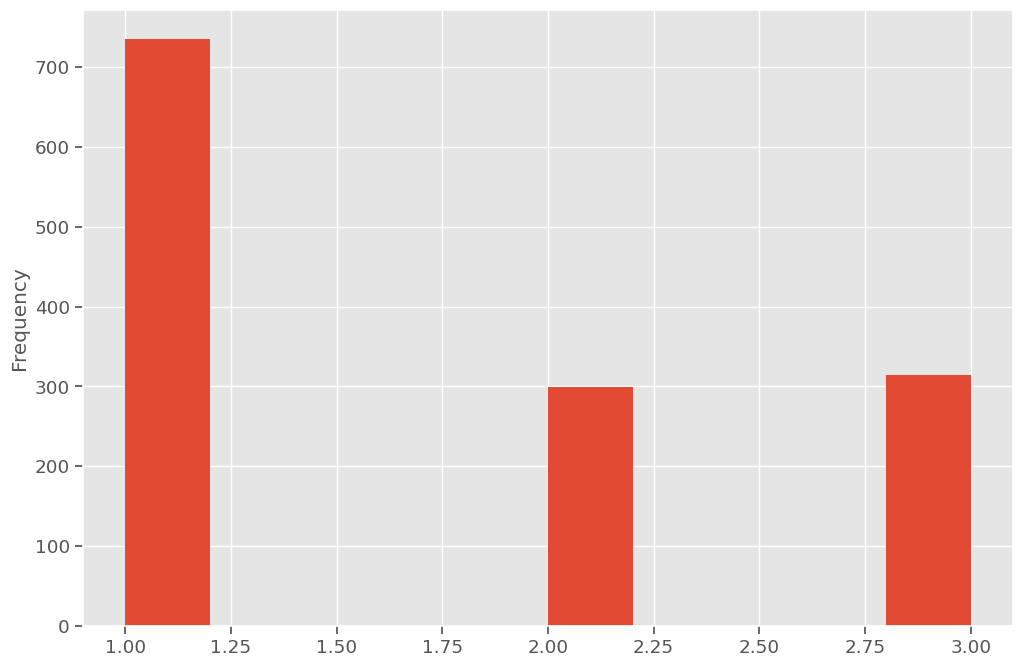

In [171]:
df_pooled_1.groupby("nome")["nome"].count().sort_values(ascending=False).plot(
    kind="hist"
)


## Dados não-empilhados

In [126]:
df_clean_0.describe()


,idade_aluno_2020,anos_pm_2020,ponto_virada_2020,inde_2020,iaa_2020,ieg_2020,ips_2020,ida_2020,ipp_2020,ipv_2020,...,ida_2022,nota_port_2022,nota_mat_2022,nota_ing_2022,qtd_aval_2022,ipp_2022,indicado_bolsa_2022,ponto_virada_2022,ipv_2022,ian_2022
count,727.0,727.0,701.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,...,862.000000,860.000000,860.000000,285.000000,862.0,862.000000,862.000000,862.000000,862.000000,862.000000
mean,12.408528,1.467675,0.134094,7.296111,8.368882,7.681155,6.737448,6.322260,7.067859,7.242243,...,6.070688,5.796318,6.306628,5.839942,3.056845,6.299364,0.153132,0.131090,7.247953,6.421114
std,2.829807,1.131195,0.340997,1.199925,1.727980,2.382122,1.374011,2.960073,1.988054,1.775110,...,2.059346,2.422292,2.092551,2.992093,0.775806,1.135510,0.360324,0.337695,1.098548,2.387816
min,7.0,0.0,0.000000,3.065001,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,0.000000,2.500010,2.500000
25%,10.0,1.0,0.000000,6.569584,7.958350,6.600000,5.625000,4.666667,6.953125,6.916665,...,4.750000,4.316667,5.166667,3.500000,2.0,5.625000,0.000000,0.000000,6.722220,5.000000
50%,12.0,1.0,0.000000,7.580834,8.750010,8.500000,7.500000,7.000000,7.500000,7.583335,...,6.333333,6.000000,6.650000,6.266667,3.0,6.250000,0.000000,0.000000,7.333335,5.000000
75%,14.0,2.0,0.000000,8.178960,9.166680,9.500000,7.500000,8.666667,8.125000,8.055557,...,7.583333,7.833333,7.833333,8.500000,4.0,7.031250,0.000000,0.000000,7.916665,10.000000
max,20.0,4.0,1.000000,9.712504,10.000020,10.000000,10.000000,10.000000,10.000000,10.000010,...,9.916667,10.000000,10.000000,10.000000,4.0,9.218750,1.000000,1.000000,10.000010,10.000000


## Dados empilhados

In [127]:
df_pooled_0.describe()


,id,ano,idade_aluno,anos_pm,ponto_virada,inde,iaa,ieg,ips,ida,...,ano_ingresso,bolsista,cg,cf,ct,nota_port,nota_mat,nota_ing,qtd_aval,indicado_bolsa
count,4044.000000,4044.000000,727.0,727.0,2247.000000,2273.000000,2275.000000,2275.000000,2275.000000,2275.000000,...,862.0,862.00000,862.000000,862.000000,862.000000,860.000000,860.000000,285.000000,862.0,862.000000
mean,673.566766,2021.000000,12.408528,1.467675,0.140187,7.071757,8.263841,7.497884,6.831462,5.956667,...,2020.49652,0.12529,431.500000,75.396752,6.617169,5.796318,6.306628,5.839942,3.056845,0.153132
std,389.290095,0.816598,2.829807,1.131195,0.347258,1.200129,2.012095,2.205902,1.296417,2.432544,...,1.787649,0.33124,248.982262,52.314184,3.989485,2.422292,2.092551,2.992093,0.775806,0.360324
min,0.000000,2020.000000,7.0,0.0,0.000000,2.468000,0.000000,0.000000,0.000000,0.000000,...,2016.0,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.0,0.000000
25%,336.750000,2020.000000,10.0,1.0,0.000000,6.399377,7.916670,6.300000,6.250000,4.500000,...,2019.0,0.00000,216.250000,30.000000,3.000000,4.316667,5.166667,3.500000,2.0,0.000000
50%,673.500000,2021.000000,12.0,1.0,0.000000,7.282096,8.750010,8.100000,7.500000,6.333333,...,2021.0,0.00000,431.500000,66.500000,6.000000,6.000000,6.650000,6.266667,3.0,0.000000
75%,1010.250000,2022.000000,14.0,2.0,0.000000,7.940281,9.500000,9.200000,7.500000,7.666667,...,2022.0,0.00000,646.750000,118.000000,9.750000,7.833333,7.833333,8.500000,4.0,0.000000
max,1348.000000,2022.000000,20.0,4.0,1.000000,9.712504,10.000020,10.000000,10.000000,10.000000,...,2022.0,1.00000,862.000000,192.000000,18.000000,10.000000,10.000000,10.000000,4.0,1.000000


In [129]:
# Contagem de valores para variáveis categóricas (não-nulos)
categorical_vars = [
    "ano",
    "instituicao_ensino_aluno",
    "inde_conceito",
    "pedra",
    "fase",
    "sinalizador_ingressante",
    "defasagem",
    "bolsista",
]
for var in categorical_vars:
    if var in df_pooled_0.columns:
        print(f"\nContagem para {var}:")
        print(df_pooled_0[var].value_counts().sort_values())



Contagem para ano:
ano
2020    1348
2021    1348
2022    1348
Name: count, dtype: int64

Contagem para instituicao_ensino_aluno:
instituicao_ensino_aluno
Einstein                   2
Escola João Paulo II       2
Escola JP II               2
Estácio                    3
UNISA                     10
FIAP                      11
Rede Decisão/União       101
Rede Decisão             127
Escola Pública          1155
Name: count, dtype: int64

Contagem para inde_conceito:
inde_conceito
A     92
D    128
C    171
B    336
Name: count, dtype: int64

Contagem para pedra:
pedra
#NULO!        2
Topázio     323
Quartzo     372
Ágata       599
Ametista    979
Name: count, dtype: int64

Contagem para fase:
fase
Fase 8     24
Fase 6     71
Fase 7     75
Fase 5    164
Fase 4    190
Fase 3    385
ALFA      394
Fase 2    472
Fase 1    500
Name: count, dtype: int64

Contagem para sinalizador_ingressante:
sinalizador_ingressante
Ingressante    249
Veterano       437
Name: count, dtype: int64

Contagem pa

A contagem dos dados mostra que as classes estão desbalanceadas ou ainda contêm valores sem sentido. 

#### Preenchimento/checagem dos valores dos índices e das pedras

##### INDE

O INDE (Índice de Desenvolvimento Educacional) é um índice composto que integra diversos outros indicadores para fornecer uma visão abrangente do desenvolvimento do estudante no programa da Passos Mágicos. Com base nos relatórios PEDE, vou explicar como o INDE é calculado:
Componentes do INDE:

- IDA (Índice de Desenvolvimento Acadêmico)
- IEG (Índice de Engajamento)
- IAA (Índice de Assiduidade e Adesão)
- IAN (Índice de Adequação de Nível)
- IPS (Índice Psicossocial)
- IPP (Índice de Potencial e Protagonismo)
- IPV (Índice de Presença Virtual) - adicionado a partir de 2020

- Cálculo do INDE:

- INDE relatório PEDE 2020 (p. 9):
> Fases 0 (ou alfa) a 7: (IDA * 0.20) + (IEG * 0.20) + (IAA * 0.10) + (IAN * 0.10) + (IPS * 0.10) + (IPP * 0.10) + (IPV * 0.20)
> Fase 8: (IDA * 0.40) + (IEG * 0.20) + (IAA * 0.10) + (IAN * 0.10) + (IPS * 0.20)

- INDE relatório PEDE 2021 (p. 9):
> Fases 0 (ou alfa) a 7: (IAN * 0.10) + (IDA * 0.20) + (IEG * 0.20) + (IAA * 0.10) +  (IPS * 0.10) + (IPP * 0.10) + (IPV * 0.20)
> Fase 8: (IAN * 0.10) + (IDA * 0.40) + (IEG * 0.20) + (IAA * 0.10) +  (IPS * 0.20) 

- INDE relatório PEDE 2022 (p. 8):
> Fases 0 (ou alfa) a 7: (IAN * 0.10) + (IDA * 0.20) + (IEG * 0.20) + (IAA * 0.10) +  (IPS * 0.10) + (IPP * 0.10) + (IPV * 0.20)
> Fase 8: (IAN * 0.10) + (IDA * 0.40) + (IEG * 0.20) + (IAA * 0.10) +  (IPS * 0.20) 

##### Pedras Conceito - substituiu o CONCEITO INDE (a coluna inde_conceito por ser eliminada):

As pedras conceito são classificações atribuídas aos estudantes com base em seu desempenho geral, principalmente no INDE. Existem quatro níveis, do mais alto para o mais baixo:

- Topázio
- Ametista
- Ágata
- Quartzo

Conforme o relatório PEDE 2022 (p. 71), as faixas aproximadas de INDE para cada pedra conceito são:

- Topázio: INDE de 8,2
- Ametista: INDE de 7,0
- Ágata: INDE de 5,2
- Quartzo: INDE de 3,1



In [131]:
# Lista de todos os índices que queremos verificar
indices = ["ida", "ieg", "iaa", "ian", "ips", "ipp", "ipv"]


# Função para verificar se um valor não é nulo e não é zero
def is_valid(x):
    return pd.notnull(x)


# Criar uma máscara booleana para linhas onde todos os índices foram calculados
indices_calculados = df_pooled_0[indices].apply(lambda x: x.apply(is_valid)).all(axis=1)

# Verificar se INDE e PEDRA também foram calculados/preenchidos para essas linhas
verificacao = (
    indices_calculados
    & df_pooled_0["inde"].apply(is_valid)
    & df_pooled_0["pedra"].notnull()
    & df_pooled_0["inde_conceito"].notnull()
)

# Resultados
total_linhas = len(df_pooled_0)
linhas_com_indices = indices_calculados.sum()
linhas_completas = verificacao.sum()

print(f"Total de linhas no DataFrame: {total_linhas}")
print(f"Linhas com todos os índices calculados: {linhas_com_indices}")
print(f"Linhas com todos os índices, INDE e PEDRA: {linhas_completas}")

if linhas_com_indices == linhas_completas:
    print("Todas as linhas com índices calculados também têm INDE e PEDRA preenchidos.")
else:
    print(
        f"Há {linhas_com_indices - linhas_completas} linhas com índices calculados, mas sem INDE ou PEDRA."
    )

# Se houver discrepâncias, vamos identificá-las
if linhas_com_indices != linhas_completas:
    discrepancias = df_pooled_0[indices_calculados & ~verificacao]
    print("\nLinhas com discrepâncias:")
    print(discrepancias[["inde_conceito", "inde", "pedra"] + indices])

# Verificar se há alguma linha com INDE e PEDRA, mas sem todos os índices
inde_pedra_sem_indices = df_pooled_0[
    df_pooled_0["inde"].apply(is_valid)
    & df_pooled_0["pedra"].notnull()
    & df_pooled_0["inde_conceito"].notnull()
    & ~indices_calculados
]

if not inde_pedra_sem_indices.empty:
    print(
        f"\nHá {len(inde_pedra_sem_indices)} linhas com INDE e PEDRA, mas sem todos os índices calculados."
    )
    print(inde_pedra_sem_indices[["inde", "pedra"] + indices])


Total de linhas no DataFrame: 4044
Linhas com todos os índices calculados: 2275
Linhas com todos os índices, INDE e PEDRA: 727
Há 1548 linhas com índices calculados, mas sem INDE ou PEDRA.

Linhas com discrepâncias:
     inde_conceito      inde     pedra   ida        ieg      iaa   ian    ips  \
1348           NaN  7.319000  Ametista  8.80   6.300000  7.50000   5.0  6.900   
1350           NaN  7.021000  Ametista  5.60   6.900000  7.10000  10.0  6.300   
1352           NaN  7.399000  Ametista  5.40   7.500000  7.40000  10.0  7.500   
1355           NaN  8.269000   Topázio  7.10   8.600000  8.80000  10.0  7.500   
1358           NaN  8.990000   Topázio  8.80  10.000000  9.00000  10.0  6.300   
...            ...       ...       ...   ...        ...      ...   ...    ...   
4036           NaN  8.150001   Topázio  7.75   9.666667  7.91668  10.0  7.500   
4037           NaN  5.674644   Quartzo  2.00   6.470435  7.41668   5.0  6.250   
4040           NaN  8.135538   Topázio  9.00   9.031839

In [146]:
# elimina coluna inde_conceito
df_pooled_0.drop(columns=["inde_conceito"], inplace=True)
df_pooled_0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        4044 non-null   int64   
 1   ano                       4044 non-null   int64   
 2   nome                      4044 non-null   string  
 3   instituicao_ensino_aluno  1413 non-null   object  
 4   idade_aluno               727 non-null    Int64   
 5   anos_pm                   727 non-null    Int64   
 6   ponto_virada              2247 non-null   float64 
 7   inde                      2273 non-null   float64 
 8   pedra                     2275 non-null   object  
 9   destaque_ieg              1589 non-null   string  
 10  destaque_ida              1589 non-null   string  
 11  destaque_ipv              1565 non-null   string  
 12  iaa                       2275 non-null   float64 
 13  ieg                       2275 non-null   float6

In [ ]:
def calc_INDE(IDA, IEG, IAA, IAN, IPS, IPP, IPV, FASE):
    print(FASE)

    if FASE == "Fase 8":
        # pg. 9 PEDE 2020
        return (IDA * 0.40) + (IEG * 0.20) + (IAA * 0.10) + (IAN * 0.10) + (IPS * 0.10)
    else:
        # pg. 9 PEDE 2020
        return (
            (IDA * 0.20)
            + (IEG * 0.20)
            + (IAA * 0.10)
            + (IAN * 0.10)
            + (IPS * 0.10)
            + (IPP * 0.10)
            + (IPV * 0.20)
        )


In [ ]:
df_pooled_0[df_pooled_0["PEDRA"] == "#NULO!"]


,ANO,NOME,INSTITUICAO_ENSINO_ALUNO,IDADE_ALUNO,ANOS_PM,PONTO_VIRADA,INDE,INDE_CONCEITO,PEDRA,DESTAQUE_IEG,...,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,QTD_AVAL,INDICADO_BOLSA,CATEGORIA_INSTITUICAO,CATEGORIA_PEDRA,CATEGORIA_DEFASAGEM,CATEGORIA_BOLSISTA
70,2021,ALUNO-71,Escola Pública,<NA>,<NA>,NaN,NaN,NaN,#NULO!,<NA>,...,NaN,NaN,NaN,NaN,<NA>,NaN,Escola Pública,#NULO!,<=-2.0,None
505,2021,ALUNO-506,Escola Pública,<NA>,<NA>,NaN,NaN,NaN,#NULO!,<NA>,...,NaN,NaN,NaN,NaN,<NA>,NaN,Escola Pública,#NULO!,>=0.0,None


In [ ]:
df_pooled_0.loc[70]


,ANO,NOME,INSTITUICAO_ENSINO_ALUNO,IDADE_ALUNO,ANOS_PM,PONTO_VIRADA,INDE,INDE_CONCEITO,PEDRA,DESTAQUE_IEG,...,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,QTD_AVAL,INDICADO_BOLSA,CATEGORIA_INSTITUICAO,CATEGORIA_PEDRA,CATEGORIA_DEFASAGEM,CATEGORIA_BOLSISTA
70,2020,ALUNO-71,Escola Pública,10,1,0.0,7.550001,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,<NA>,NaN,Escola Pública,Ametista,None,None
70,2021,ALUNO-71,Escola Pública,<NA>,<NA>,NaN,NaN,NaN,#NULO!,<NA>,...,NaN,NaN,NaN,NaN,<NA>,NaN,Escola Pública,#NULO!,<=-2.0,None
70,2022,ALUNO-71,None,<NA>,<NA>,NaN,NaN,NaN,None,<NA>,...,NaN,NaN,NaN,NaN,<NA>,NaN,None,None,None,None


df_pooled_0.iloc[69]

#### A partir da coluna `INSTITUICAO_ENSINO_ALUNO` é gerada uma nova coluna `CATEGORIA_INSTITUICAO`

In [58]:
def categorizar_instituicao(instituicao):
    if pd.isna(instituicao):
        return None
    elif instituicao == "Escola Pública":
        return "Escola Pública"
    elif instituicao in ["FIAP", "UNISA", "Estácio"]:
        return "Ensino Superior Privado"
    else:
        return "Escolas Privadas"


# Criar nova coluna com as categorias
df_pooled_0["CATEGORIA_INSTITUICAO"] = df_pooled_0["INSTITUICAO_ENSINO_ALUNO"].apply(
    categorizar_instituicao
)

# Verificar o resultado
print(df_pooled_0["CATEGORIA_INSTITUICAO"].value_counts())

# Se quiser ver a distribuição percentual
print("\nDistribuição percentual por categoria de instituição:")
print(df_pooled_0["CATEGORIA_INSTITUICAO"].value_counts(normalize=True) * 100)

# Para verificar se a categorização está correta (tabulação cruzada)
print(
    pd.crosstab(
        df_pooled_0["INSTITUICAO_ENSINO_ALUNO"], df_pooled_0["CATEGORIA_INSTITUICAO"]
    )
)


CATEGORIA_INSTITUICAO
Escola Pública             1155
Escolas Privadas            234
Ensino Superior Privado      24
Name: count, dtype: int64

Distribuição percentual por categoria de instituição:
CATEGORIA_INSTITUICAO
Escola Pública             81.740977
Escolas Privadas           16.560510
Ensino Superior Privado     1.698514
Name: proportion, dtype: float64
CATEGORIA_INSTITUICAO     Ensino Superior Privado  Escola Pública  \
INSTITUICAO_ENSINO_ALUNO                                            
Einstein                                        0               0   
Escola JP II                                    0               0   
Escola João Paulo II                            0               0   
Escola Pública                                  0            1155   
Estácio                                         3               0   
FIAP                                           11               0   
Rede Decisão                                    0               0   
Rede Decisão/U

#### Corrige a coluna `PEDRA`

In [104]:
def categorizar_pedra(pedra):
    if pd.isna(pedra):
        return None
    else:
        return pedra


df_pooled_0["CATEGORIA_PEDRA"] = df_pooled_0["PEDRA"].apply(categorizar_pedra)

# Verificar o resultado
print(df_pooled_0["CATEGORIA_PEDRA"].value_counts())

# Se quiser ver a distribuição percentual
print("\nDistribuição percentual por categoria de pedra:")
print(df_pooled_0["CATEGORIA_PEDRA"].value_counts(normalize=True) * 100)

# Para verificar se a categorização está correta (tabulação cruzada)
print(pd.crosstab(df_pooled_0["PEDRA"], df_pooled_0["CATEGORIA_PEDRA"]))


CATEGORIA_PEDRA
Ametista    979
Ágata       599
Quartzo     372
Topázio     323
#NULO!        2
Name: count, dtype: int64

Distribuição percentual por categoria de pedra:
CATEGORIA_PEDRA
Ametista    43.032967
Ágata       26.329670
Quartzo     16.351648
Topázio     14.197802
#NULO!       0.087912
Name: proportion, dtype: float64
CATEGORIA_PEDRA  #NULO!  Ametista  Quartzo  Topázio  Ágata
PEDRA                                                     
#NULO!                2         0        0        0      0
Ametista              0       979        0        0      0
Quartzo               0         0      372        0      0
Topázio               0         0        0      323      0
Ágata                 0         0        0        0    599


#### Criar a nova coluna `CATEGORIA_DEFASAGEM` a partir de `DEFASAGEM` para melhor balancear os dados 

In [55]:
def categorizar_defasagem(defasagem):
    if pd.isna(defasagem):
        return None
    elif defasagem >= 0:
        return ">=0.0"
    elif defasagem == -1:
        return "-1.0"
    else:
        return "<=-2.0"


# Converter a coluna DEFASAGEM para numérica, caso não esteja
df_pooled_0["DEFASAGEM"] = pd.to_numeric(df_pooled_0["DEFASAGEM"], errors="coerce")

# Criar nova coluna com as categorias
df_pooled_0["CATEGORIA_DEFASAGEM"] = df_pooled_0["DEFASAGEM"].apply(
    categorizar_defasagem
)

# Verificar o resultado
print("Contagem por categoria de defasagem:")
print(df_pooled_0["CATEGORIA_DEFASAGEM"].value_counts())

# Se quiser ver a distribuição percentual
print("\nDistribuição percentual por categoria de defasagem:")
print(df_pooled_0["CATEGORIA_DEFASAGEM"].value_counts(normalize=True) * 100)

# Para verificar se a categorização está correta, você pode fazer uma tabulação cruzada
print("\nTabulação cruzada de DEFASAGEM vs CATEGORIA_DEFASAGEM:")
print(pd.crosstab(df_pooled_0["DEFASAGEM"], df_pooled_0["CATEGORIA_DEFASAGEM"]))


Contagem por categoria de defasagem:
CATEGORIA_DEFASAGEM
-1.0      317
>=0.0     266
<=-2.0    103
Name: count, dtype: int64

Distribuição percentual por categoria de defasagem:
CATEGORIA_DEFASAGEM
-1.0      46.209913
>=0.0     38.775510
<=-2.0    15.014577
Name: proportion, dtype: float64

Tabulação cruzada de DEFASAGEM vs CATEGORIA_DEFASAGEM:
CATEGORIA_DEFASAGEM  -1.0  <=-2.0  >=0.0
DEFASAGEM                               
-4.0                    0       2      0
-3.0                    0       8      0
-2.0                    0      93      0
-1.0                  317       0      0
 0.0                    0       0    249
 1.0                    0       0     16
 3.0                    0       0      1


#### Cria a coluna `CATEGORIA_BOLSISTA` a partir da coluna `BOLSISTA` para fins de padronização e melhor representação nos gráficos

In [56]:
def categorizar_bolsista(bolsista):
    if pd.isna(bolsista):
        return None
    elif bolsista == 1.0:
        return "Sim"
    else:
        return "Não"


df_pooled_0["CATEGORIA_BOLSISTA"] = df_pooled_0["BOLSISTA"].apply(categorizar_bolsista)

# Verificar o resultado
print("Contagem por categoria de bolsista:")
print(df_pooled_0["CATEGORIA_BOLSISTA"].value_counts())

# Se quiser ver a distribuição percentual
print("\nDistribuição percentual por categoria de defasagem:")
print(df_pooled_0["CATEGORIA_BOLSISTA"].value_counts(normalize=True) * 100)

# Para verificar se a categorização está correta, você pode fazer uma tabulação cruzada
print("\nTabulação cruzada de BOLSISTA vs CATEGORIA_BOLSISTA:")
print(pd.crosstab(df_pooled_0["BOLSISTA"], df_pooled_0["CATEGORIA_BOLSISTA"]))


Contagem por categoria de bolsista:
CATEGORIA_BOLSISTA
Não    754
Sim    108
Name: count, dtype: int64

Distribuição percentual por categoria de defasagem:
CATEGORIA_BOLSISTA
Não    87.470998
Sim    12.529002
Name: proportion, dtype: float64

Tabulação cruzada de BOLSISTA vs CATEGORIA_BOLSISTA:
CATEGORIA_BOLSISTA  Não  Sim
BOLSISTA                    
0.0                 754    0
1.0                   0  108


#### Visão dos dados até o momento

Existe uma quantidade substancial de dados ausentes `NA` (e também `"ND"`) em todas as colunas:

In [68]:
print(f"Total de linhas: {len(df_pooled_0)}")
pd.DataFrame(
    {
        "Total": df_pooled_0.isnull().sum(),
        "Percentual": df_pooled_0.isnull().sum() / len(df_pooled_0) * 100,
    }
)


Total de linhas: 4044


,Total,Percentual
ANO,0,0.000000
NOME,0,0.000000
INSTITUICAO_ENSINO_ALUNO,2631,65.059347
IDADE_ALUNO,3317,82.022750
ANOS_PM,3317,82.022750
PONTO_VIRADA,1797,44.436202
INDE,1771,43.793274
INDE_CONCEITO,3317,82.022750
PEDRA,1769,43.743818
DESTAQUE_IEG,2455,60.707221


Existe uma quantidade substancial de dados ausentes `NA` (e também `"ND"`) em todas as colunas:

In [102]:
print(
    calc_INDE(
        df_pooled_0.iloc[3]["IDA"],
        df_pooled_0.iloc[3]["IEG"],
        df_pooled_0.iloc[3]["IAA"],
        df_pooled_0.iloc[3]["IAN"],
        df_pooled_0.iloc[3]["IPS"],
        df_pooled_0.iloc[3]["IPP"],
        df_pooled_0.iloc[3]["IPV"],
        df_pooled_0.iloc[3]["FASE"],
    )
)


Fase 1
5.076252


In [ ]:
# Limpeza dos nomes das colunas utilizando o `pyjanitor`

import janitor

df_pooled_1 = df_pooled_0.clean_names()
df_pooled_1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4044 entries, 0 to 1348
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ano                       4044 non-null   int64   
 1   nome                      4044 non-null   string  
 2   instituicao_ensino_aluno  1413 non-null   object  
 3   idade_aluno               727 non-null    Int64   
 4   anos_pm                   727 non-null    Int64   
 5   ponto_virada              2247 non-null   float64 
 6   inde                      2273 non-null   float64 
 7   inde_conceito             727 non-null    category
 8   pedra                     2275 non-null   object  
 9   destaque_ieg              1589 non-null   string  
 10  destaque_ida              1589 non-null   string  
 11  destaque_ipv              1565 non-null   string  
 12  iaa                       2275 non-null   float64 
 13  ieg                       2275 non-null   float64 
 1

In [76]:
df_pooled_1.complete("iaa", "ano")


,ano,nome,instituicao_ensino_aluno,idade_aluno,anos_pm,ponto_virada,inde,inde_conceito,pedra,destaque_ieg,...,ct,nota_port,nota_mat,nota_ing,qtd_aval,indicado_bolsa,categoria_instituicao,categoria_pedra,categoria_defasagem,categoria_bolsista
0,2020,ALUNO-55,Rede Decisão/União,17,3,1.0,6.878125,C,Ágata,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,<NA>,NaN,Escolas Privadas,Ágata,None,None
1,2020,ALUNO-198,Escola Pública,16,3,0.0,5.518958,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,NaN,NaN,NaN,NaN,<NA>,NaN,Escola Pública,Quartzo,None,None
2,2020,ALUNO-202,Escola Pública,12,2,0.0,3.779999,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,NaN,NaN,NaN,NaN,<NA>,NaN,Escola Pública,Quartzo,None,None
3,2020,ALUNO-206,Escola Pública,16,2,0.0,5.216249,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,NaN,NaN,NaN,NaN,<NA>,NaN,Escola Pública,Quartzo,None,None
4,2020,ALUNO-344,Escola Pública,16,1,0.0,4.348541,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,NaN,NaN,NaN,NaN,<NA>,NaN,Escola Pública,Quartzo,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4170,2022,ALUNO-1339,None,<NA>,<NA>,NaN,NaN,NaN,None,<NA>,...,NaN,NaN,NaN,NaN,<NA>,NaN,None,None,None,None
4171,2022,ALUNO-1341,None,<NA>,<NA>,NaN,NaN,NaN,None,<NA>,...,NaN,NaN,NaN,NaN,<NA>,NaN,None,None,None,None
4172,2022,ALUNO-1344,None,<NA>,<NA>,NaN,NaN,NaN,None,<NA>,...,NaN,NaN,NaN,NaN,<NA>,NaN,None,None,None,None
4173,2022,ALUNO-1345,None,<NA>,<NA>,NaN,NaN,NaN,None,<NA>,...,NaN,NaN,NaN,NaN,<NA>,NaN,None,None,None,None


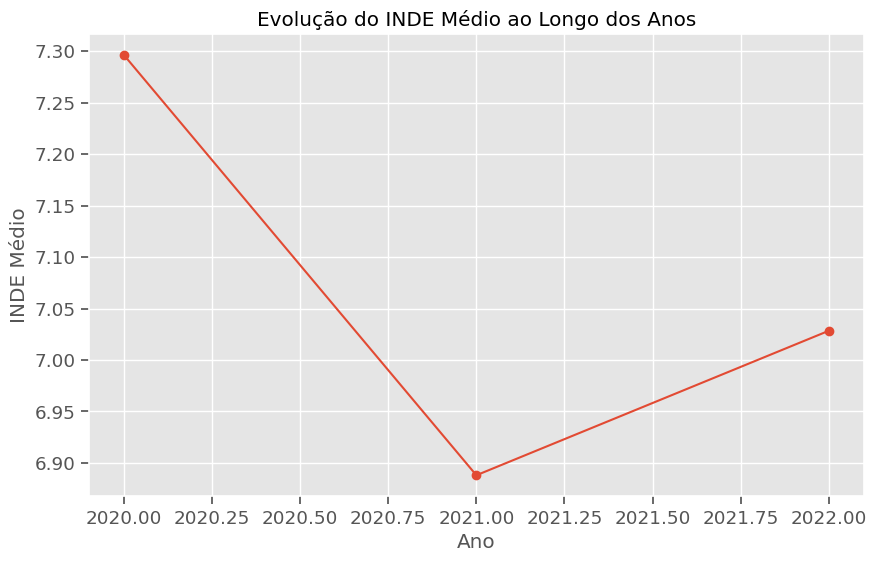

In [29]:
# Evolução do INDE ao longo dos anos
inde_by_year = df_pooled_0.groupby("ANO")["INDE"].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(inde_by_year["ANO"], inde_by_year["INDE"], marker="o")
plt.title("Evolução do INDE Médio ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("INDE Médio")
plt.grid(True)
plt.show()


In [39]:
df_pooled_0["PEDRA"].isnull().sum()


1771

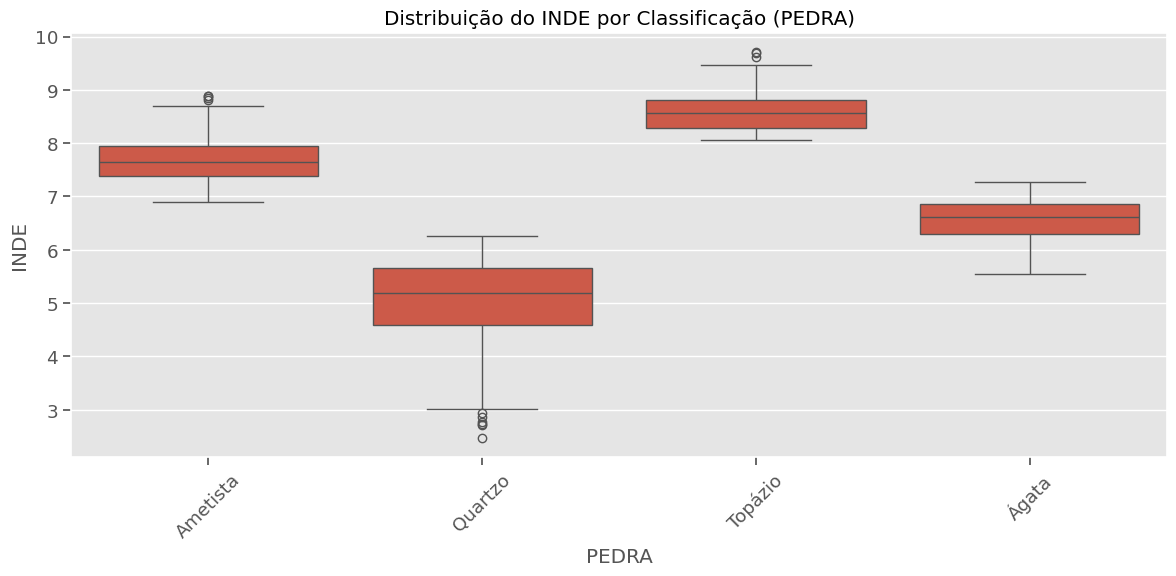

In [40]:
# Removendo linhas com valores nulos na coluna 'PEDRA'
df_clean = df_pooled_0.dropna(subset=["PEDRA"])

# Criando o boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="PEDRA", y="INDE", data=df_clean)
plt.title("Distribuição do INDE por Classificação (PEDRA)")
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta o layout para evitar cortes nos rótulos
plt.show()


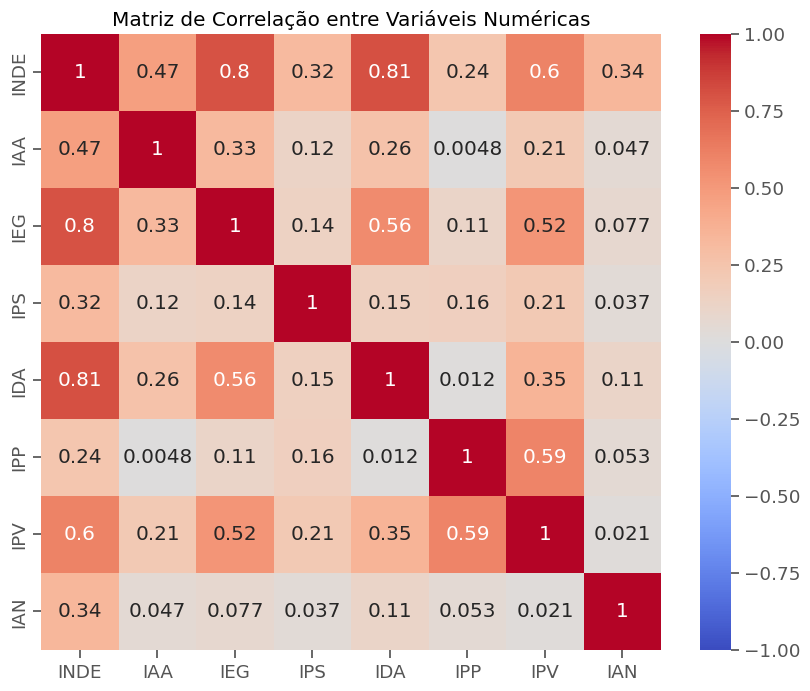

In [32]:
# Heatmap de correlação entre variáveis numéricas
numeric_vars = ["INDE", "IAA", "IEG", "IPS", "IDA", "IPP", "IPV", "IAN"]
corr_matrix = df_pooled_0[numeric_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()


In [42]:
df_pooled_0["INDE"].isnull().sum()


1771

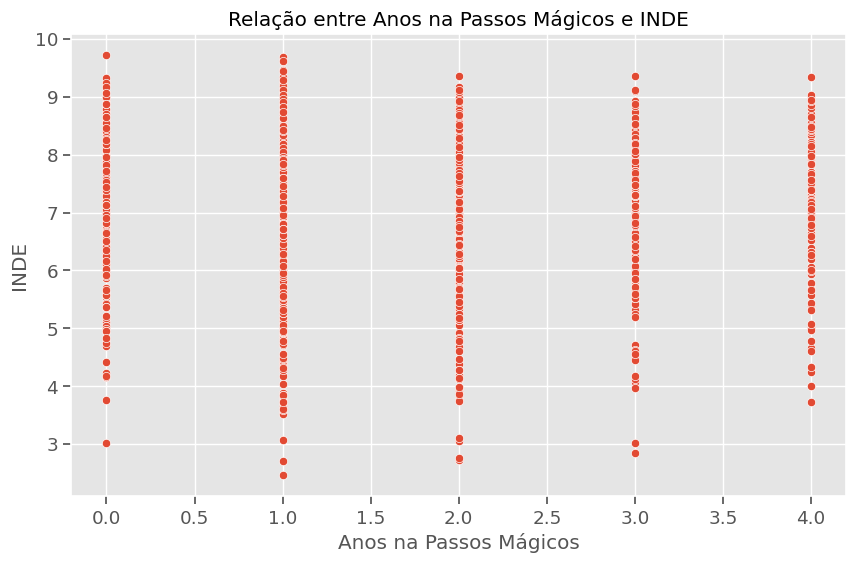

In [44]:
# Removendo linhas com valores nulos na coluna 'PEDRA'
df_clean = df_pooled_0.dropna(subset=["INDE"])

# Análise da relação entre ANOS_PM e INDE
plt.figure(figsize=(10, 6))
sns.scatterplot(x="ANOS_PM", y="INDE", data=df_clean)
plt.title("Relação entre Anos na Passos Mágicos e INDE")
plt.xlabel("Anos na Passos Mágicos")
plt.ylabel("INDE")
plt.show()


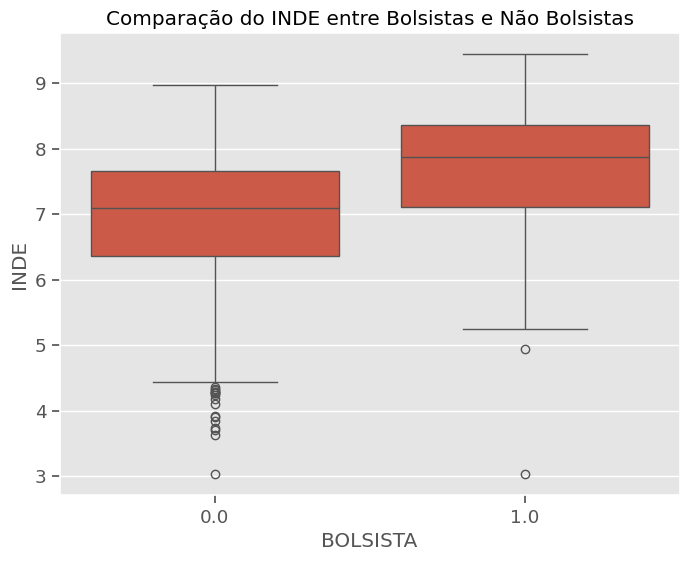

In [47]:
# Removendo linhas com valores nulos na coluna 'PEDRA'
df_clean = df_pooled_0.dropna(subset=["BOLSISTA"])

# Comparação do INDE entre bolsistas e não bolsistas
plt.figure(figsize=(8, 6))
sns.boxplot(x="BOLSISTA", y="INDE", data=df_clean)
plt.title("Comparação do INDE entre Bolsistas e Não Bolsistas")
plt.show()


In [48]:
# Teste t para comparar INDE entre bolsistas e não bolsistas
bolsistas = df_clean[df_clean["BOLSISTA"] == 1]["INDE"]
nao_bolsistas = df_clean[df_clean["BOLSISTA"] == 0]["INDE"]
t_stat, p_value = stats.ttest_ind(bolsistas, nao_bolsistas)
print(f"Resultado do teste t para INDE entre bolsistas e não bolsistas:")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


Resultado do teste t para INDE entre bolsistas e não bolsistas:
t-statistic: 7.470902690372688
p-value: 1.957837397881734e-13


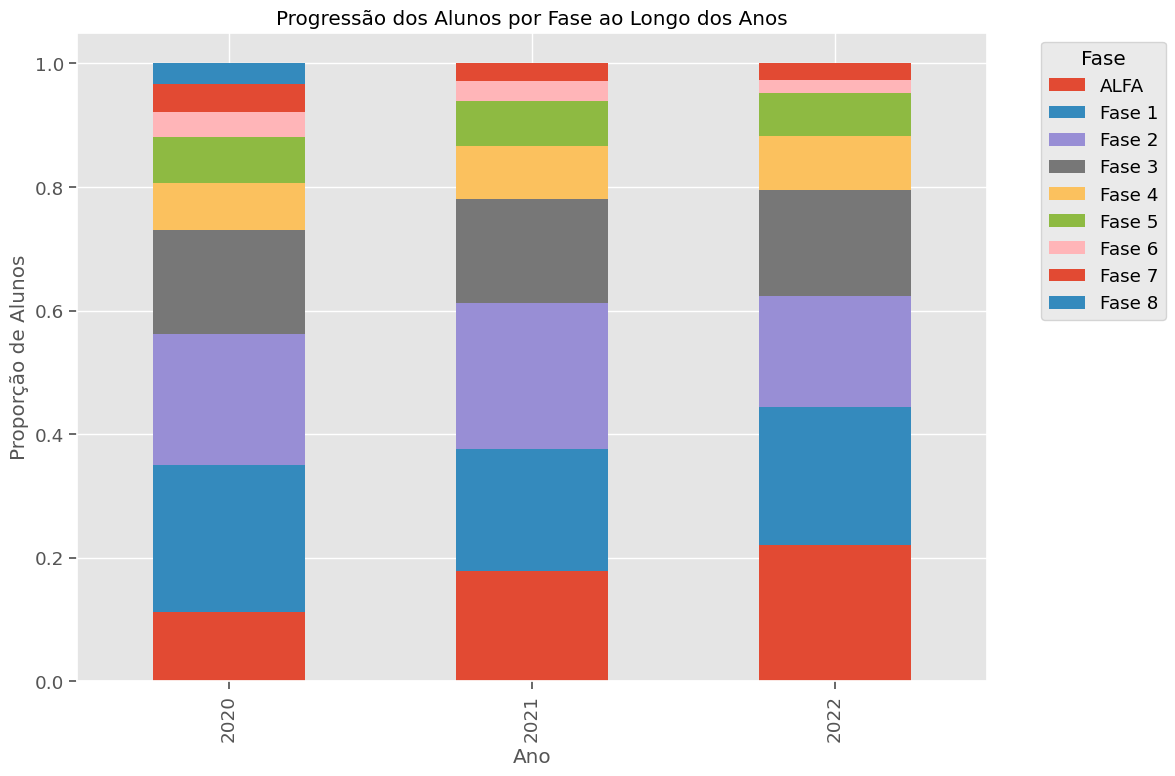

In [50]:
# Análise da progressão dos alunos
progression = df_pooled_0.groupby("ANO")["FASE"].value_counts(normalize=True).unstack()
progression.plot(kind="bar", stacked=True)
plt.title("Progressão dos Alunos por Fase ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Proporção de Alunos")
plt.legend(title="Fase", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


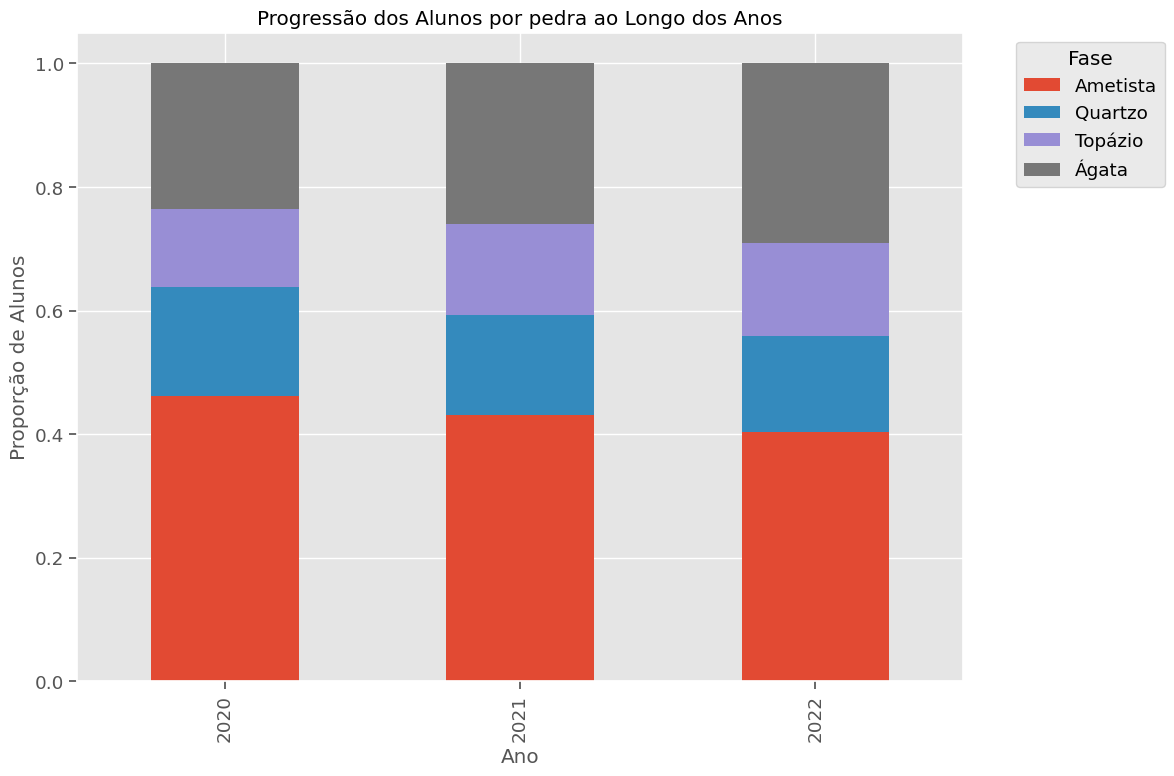

In [51]:
# Análise da progressão dos alunos
progression = df_pooled_0.groupby("ANO")["PEDRA"].value_counts(normalize=True).unstack()
progression.plot(kind="bar", stacked=True)
plt.title("Progressão dos Alunos por pedra ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Proporção de Alunos")
plt.legend(title="Fase", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
